### 5주차 확률
- 확률분포함수

In [136]:
# 연습문제 6.4.3
def manipulated_disk(a = 0, b = 0):
    if a < 0 or b < 0 :
        prob = 0
        #print('The angle should be larger than zero.')
    elif  a > 360 or b > 360:
        prob = 1
        #print('The angle should be smaller than 360 degree.')
    elif a > b : 
        prob = 0
        #print('The first input should be larger than second one.')
    elif a == b : 
        prob = 0
    elif a < 180 and b <= 180 :
        num = 360 / (b - a)
        add_num = 180 / (b - a) 
        prob =  2 / (num + add_num)
    elif a < 180 and b > 180:
        prob = manipulated_disk(a, 180) + manipulated_disk(180, b)
    elif a >= 180 and b > 180:
        num = 360 / (b - a)
        add_num = 180 / (b - a) 
        prob =  1 / (num + add_num)
    #print('P(%d, %d) is %f.' %(a, b, prob))
    return prob   

In [137]:
manipulated_disk(90, 90)
manipulated_disk(-3, 90)
manipulated_disk(360, 90)
manipulated_disk(90, 400)

1

In [144]:
manipulated_disk(0, 180)
manipulated_disk(90, 180)
manipulated_disk(180, 270)
manipulated_disk(180, 360)
manipulated_disk(0, 360)

0.3333333333333333

In [139]:
def F(x = 180):
    prob = manipulated_disk(0, x)
    return prob  

In [140]:
F(270)

0.8333333333333333

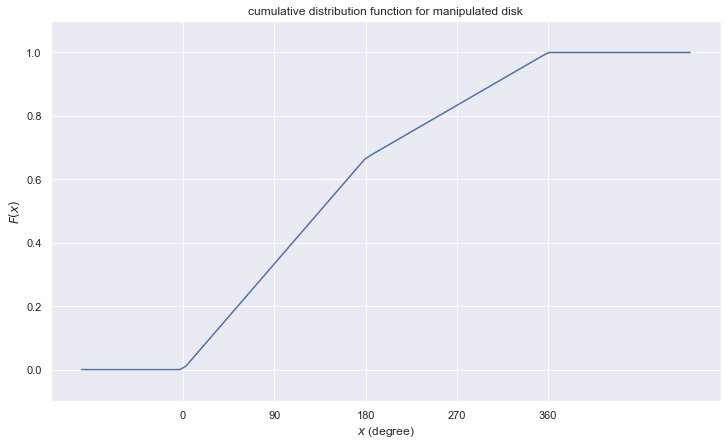

In [141]:
# 누적분포함수 차트 그리기
x = np.linspace(-100, 500, 100)
# y = np.empty((100,))
# for i in range(len(x)):
#     y[i] = F(x[i])
y = np.array(list(map(F, x)))
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.xticks([0, 90, 180, 270, 360])
plt.title('cumulative distribution function for manipulated disk')
plt.xlabel('$x$ (degree)')
plt.ylabel('$F(x)$')
plt.show()

In [158]:
from scipy.misc import derivative
#print(derivative(F, 0, dx = 0.1))
def f(x):
    return derivative(F, x, dx = 1)
f(3)

0.0024074074074074076

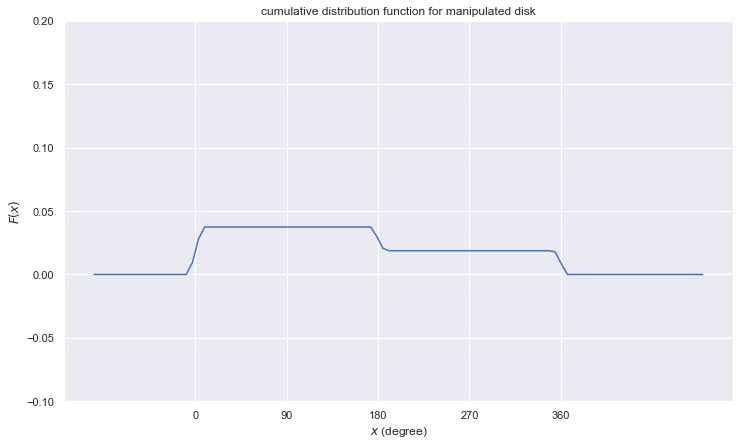

In [161]:
# 확률밀도함수의 차트 그리기
x = np.linspace(-100, 500, 100)
y = np.gradient(list(map(F, x)), 600/1000)
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.ylim(-0.1, 0.2)
plt.xticks([0, 90, 180, 270, 360])
plt.title('cumulative distribution function for manipulated disk')
plt.xlabel('$x$ (degree)')
plt.ylabel('$F(x)$')
plt.show()

In [146]:
manipulated_disk(180)

0.6666666666666666

In [117]:
y

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01122334, 0.03367003, 0.05611672,
       0.07856341, 0.1010101 , 0.12345679, 0.14590348, 0.16835017,
       0.19079686, 0.21324355, 0.23569024, 0.25813692, 0.28058361,
       0.3030303 , 0.32547699, 0.34792368, 0.37037037, 0.39281706,
       0.41526375, 0.43771044, 0.46015713, 0.48260382, 0.50505051,
       0.52749719, 0.54994388, 0.57239057, 0.59483726, 0.61728395,
       0.63973064, 0.66217733, 0.67564534, 0.68686869, 0.69809203,
       0.70931538, 0.72053872, 0.73176207, 0.74298541, 0.75420875,
       0.7654321 , 0.77665544, 0.78787879, 0.79910213, 0.81032548,
       0.82154882, 0.83277217, 0.84399551, 0.85521886, 0.8664422 ,
       0.87766554, 0.88888889, 0.90011223, 0.91133558, 0.92255892,
       0.93378227, 0.94500561, 0.95622896, 0.9674523 , 0.97867

### 피지엠파이 패키지
- joint distribution 함수

In [2]:
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD

In [3]:
px = JPD(['X'], [2], np.array([12, 8]) / 20)
print(px)

+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+


In [4]:
py = JPD(['Y'], [2], np.array([10, 10]) / 20)
print(py)

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.5000 |
+------+--------+
| Y(1) | 0.5000 |
+------+--------+


In [10]:
pxy = JPD(['X', 'Y'], [2, 2], np.array([3, 9, 7, 1]) / 20)
print(pxy)

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.1500 |
+------+------+----------+
| X(0) | Y(1) |   0.4500 |
+------+------+----------+
| X(1) | Y(0) |   0.3500 |
+------+------+----------+
| X(1) | Y(1) |   0.0500 |
+------+------+----------+


In [6]:
pxy2 = JPD(['X', 'Y'], [2, 2], np.array([6, 6, 4, 4]) / 20)
print(pxy2)

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.3000 |
+------+------+----------+
| X(0) | Y(1) |   0.3000 |
+------+------+----------+
| X(1) | Y(0) |   0.2000 |
+------+------+----------+
| X(1) | Y(1) |   0.2000 |
+------+------+----------+


In [7]:
pmx = pxy.marginal_distribution(['X'], inplace = False)
print(pmx)

+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+


In [11]:
pmx = pxy.marginalize(['Y'], inplace = False)
print(pmx)

+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+


In [12]:
# 남자일 때 머리가 긴 확률, 머리가 짧은 확률(Y | X = 0 )
py_on_x0 = pxy.conditional_distribution([('X', 0)], inplace = False)
print(py_on_x0)

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.2500 |
+------+--------+
| Y(1) | 0.7500 |
+------+--------+


In [14]:
py_on_x1 = pxy.conditional_distribution([('X', 1)], inplace = False)
print(py_on_x1)

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.8750 |
+------+--------+
| Y(1) | 0.1250 |
+------+--------+


In [15]:
pxy.check_independence(['X'], ['Y'])

False

In [16]:
print(px*py)

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.3000 |
+------+------+----------+
| X(0) | Y(1) |   0.3000 |
+------+------+----------+
| X(1) | Y(0) |   0.2000 |
+------+------+----------+
| X(1) | Y(1) |   0.2000 |
+------+------+----------+


In [17]:
print(pxy)

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.1500 |
+------+------+----------+
| X(0) | Y(1) |   0.4500 |
+------+------+----------+
| X(1) | Y(0) |   0.3500 |
+------+------+----------+
| X(1) | Y(1) |   0.0500 |
+------+------+----------+


In [18]:
pxy2.check_independence(['X'], ['Y'])

True

### 베이즈 정리

In [20]:
from pgmpy.factors.discrete import TabularCPD

In [25]:
cpd_X = TabularCPD('X', 2, [[1 - 0.002], [0.002]])
print(cpd_X)

+------+-------+
| X(0) | 0.998 |
+------+-------+
| X(1) | 0.002 |
+------+-------+


In [26]:
cpd_Y_on_X = TabularCPD('Y', 2, np.array([[0.95, 0.01], [0.05, 0.99]]),
                       evidence=['X'], evidence_card=[2])
print(cpd_Y_on_X)

+------+------+------+
| X    | X(0) | X(1) |
+------+------+------+
| Y(0) | 0.95 | 0.01 |
+------+------+------+
| Y(1) | 0.05 | 0.99 |
+------+------+------+


In [27]:
from pgmpy.models import BayesianModel

model = BayesianModel([['X', 'Y']])
model.add_cpds(cpd_X, cpd_Y_on_X)
model.check_model()

True